# Predicting Car Prices using K-Nearest Neighbor Algorithms
In this project we will predict car prices using technical features recorded in [this dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). You can read more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/automobile).

## Getting Familiar with the Dataset

In [1]:
import pandas as pd
pd.options.display.max_columns = 50

cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors',
     'body_style','drive_wheels','engine_location','wheel_base','length','width','height',
     'curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke',
     'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

cars = pd.read_csv('imports-85.data',names=cols)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cols_numeric = ['symboling', 'normalized_losses','wheel_base','length','width' ,'height','curb_weight','engine_size','horsepower','bore','stroke','compression_ratio','peak_rpm','city_mpg','highway_mpg','price']

cars_numeric = cars[cols_numeric]
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
horsepower           205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(5), object(6)
memory usage: 25.7+ KB


In [3]:
cars_numeric.isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
horsepower           0
bore                 0
stroke               0
compression_ratio    0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Data Cleaning
As we can consider after going over the first rows, there are missing values that have a '?' symbol. Since we cannot have missing values for our predictions, we will first replace the '?' values with null values.

In [4]:
import numpy as np

cars_numeric.replace(to_replace='?',value=np.nan,inplace=True)

cars_numeric=cars_numeric.astype('float').copy()
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null float64
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_size          205 non-null float64
horsepower           203 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(16)
memory usage: 25.7 KB


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
cars_numeric.shape

(205, 16)

In [6]:
cars_numeric.isnull().sum()

symboling             0
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
horsepower            2
bore                  4
stroke                4
compression_ratio     0
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

As we can see, there are missing values in some columns, especially in the column `normalized_losses`. Since we cannot have any null values for our prediction model, we will treat them as follows:
 - `normalized_losses`: We will determine the mean value of this column and apply it to the 41 missing entries.
 - `horsepower`: Determine and apply the mean value.
 - `bore`: Determine and apply the mean value.
 - `stroke`: Determine and apply the mean value.
 - `peak_rpm`: Determine and apply the mean value.
 - `price`: Since our model is trying to predict the price, we cannot use the 4 rows with missing values to train/test our model, so we will drop the 4 rows that contain missing prices.

In [7]:
cars_numeric.dropna(subset=['price'],inplace=True)
cars_numeric.fillna(cars_numeric.mean(),inplace=True)

cars_numeric.isnull().sum() #confirm we do not have more null values

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
horsepower           0
bore                 0
stroke               0
compression_ratio    0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now that we treated all the missing values, it's time to decide which of the numeric columns will be used for our prediction model. This decision will be made by using common sense and running univariable KNN tests. The features with the lowest [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) will be considered to be the ones that predict our prices more accurately.

## Data Rescaling
The next step will be normalizing our column values, so all values range from 0 to 1 and each feature contributes approximately proportionately to the [euclidean distances](https://en.wikipedia.org/wiki/Euclidean_distance) that will be calculated will all column values except for the target column.

We will rescale our values using the min-max normalization method:

In [8]:
price_series = cars_numeric['price'].copy()
cars_numeric = (cars_numeric - cars_numeric.min())/(cars_numeric.max()-cars_numeric.min())
cars_numeric['price'] = price_series

cars_numeric.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,horsepower,bore,stroke,compression_ratio,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.294393,0.664286,0.290476,0.1250,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.294393,0.664286,0.290476,0.1250,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.495327,0.100000,0.666667,0.1250,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.252336,0.464286,0.633333,0.1875,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.313084,0.464286,0.633333,0.0625,0.551020,0.138889,0.157895,17450.0


## Building Univariate k-Nearest Neighbors Models

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col,target_col,df,k_value=5):
    np.random.seed(1)
    shuffle_df = df.reindex(np.random.permutation(df.index)) #shuffle dataframe with indexes
    
    middle_row = int(len(shuffle_df)/2) #use this row index to delimit train_df and test_df
    train_df = shuffle_df.iloc[0:middle_row]
    test_df = shuffle_df.iloc[middle_row:]
    
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(train_df[[training_col]],train_df[target_col])
    predicted = knn.predict(test_df[[training_col]])
    
    rmse = mean_squared_error(test_df[target_col],predicted)**(1/2)
    
    return rmse

training_col = []
k_value = []
rmses = []

for col in cars_numeric.columns[:-1]: #all cols except for price
    for kval in range(1,10,2):
        training_col.append(col)
        k_value.append(kval)
        rmses.append(knn_train_test(col,'price',cars_numeric,kval))
        
results = pd.DataFrame(data = {'training_col':training_col,'k_value':k_value,'RMSE':rmses}).sort_values(by='RMSE')                                                      

results

,RMSE,k_value,training_col
36,2840.562806,3,engine_size
37,3238.462830,5,engine_size
35,3258.486106,1,engine_size
38,3563.086774,7,engine_size
39,3831.824415,9,engine_size
41,4020.849263,3,horsepower
42,4037.037713,5,horsepower
40,4170.054848,1,horsepower
33,4330.608104,7,curb_weight
43,4353.811860,7,horsepower


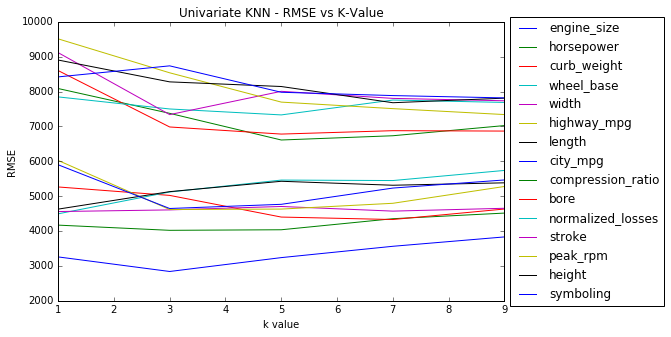

In [10]:
import matplotlib.pyplot as plt
### DO PLOTS WITH SEABORN - NEED LATEST SEABORN MODULE VERSION TO DO THAT
%matplotlib inline
plt.figure(figsize=(8,5))
for col_name in results['training_col'].unique():
    plot_df = results[results['training_col'] == col_name].sort_values(by='k_value')
    plt.plot(plot_df['k_value'],plot_df['RMSE'],label=col_name);
    plt.title('Univariate KNN - RMSE vs K-Value')
    plt.legend()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('k value')
plt.ylabel('RMSE')


In [11]:
univar_features_sorted = results[['training_col','RMSE']].groupby('training_col').mean().sort_values(by='RMSE')

print('Univariate KNN - Mean of RMSE for k-Values = [1,3,5,7,9]','\n'*2,univar_features_sorted)

Univariate KNN - Mean of RMSE for k-Values = [1,3,5,7,9] 

                           RMSE
training_col                  
engine_size        3346.484586
horsepower         4219.377860
width              4618.910560
curb_weight        4730.075815
highway_mpg        5069.469256
length             5176.394904
city_mpg           5202.409003
wheel_base         5252.392462
compression_ratio  7166.073599
bore               7222.472445
normalized_losses  7624.407151
stroke             8000.240467
peak_rpm           8119.365233
height             8163.346266
symboling          8167.734209


## Building Multivariate k-Nearest Neighbors Models
In the list printed above we can see the parameters that best predict the car prices from our dataset individually. We will now build multivariate models using the top 5 features. These features have been chosen by comparing the mean of the RMSE vales for k = 1, 3, 5, 7 and 9:

In [12]:
top_features = univar_features_sorted[:5].copy()
top_features['top'] = pd.Series([i for i in range(1,6)],index = top_features.index)
print(top_features)

                     RMSE  top
training_col                  
engine_size   3346.484586    1
horsepower    4219.377860    2
width         4618.910560    3
curb_weight   4730.075815    4
highway_mpg   5069.469256    5


In [13]:
#modification of univariate KNN function: accept training cols as a list instead of a string


def knn_train_test_multivar(training_cols,target_col,df,k_value=5):
    np.random.seed(1)
    shuffle_df = df.reindex(np.random.permutation(df.index)) #shuffle dataframe with indexes
    
    middle_row = int(len(shuffle_df)/2) #use this row index to delimit train_df and test_df
    train_df = shuffle_df.iloc[0:middle_row]
    test_df = shuffle_df.iloc[middle_row:]
    
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(train_df[training_cols],train_df[target_col])
    predicted = knn.predict(test_df[training_cols])
    
    rmse = mean_squared_error(test_df[target_col],predicted)**(1/2)
    
    return rmse

n_training_cols = []
k_value_multivar = []
rmses_multivar = []

for i in range(2,6): ### number of features used from our top 5
    for kval in range(1,25): ### k-values ranging from 1 to 25
        rmse = knn_train_test_multivar(top_features[:i].index,'price',cars_numeric,k_value=kval)
        rmses_multivar.append(rmse)
        k_value_multivar.append(kval)
        n_training_cols.append(i)
        
results_multivar = pd.DataFrame(data = {'n_training_cols':n_training_cols,'k_value':k_value_multivar,'RMSE':rmses_multivar}).sort_values(by='RMSE')                                                      

results_multivar

,RMSE,k_value,n_training_cols
1,2657.796381,2,2
0,2783.620424,1,2
2,2792.586573,3,2
72,2824.706123,1,5
3,2891.532969,4,2
73,2915.673165,2,5
4,2949.881728,5,2
48,2952.725687,1,4
74,3012.420455,3,5
5,3096.402602,6,2


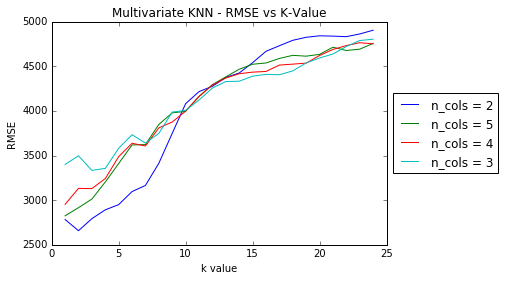

In [14]:
for n in results_multivar['n_training_cols'].unique():
    results_grouped = results_multivar[
        results_multivar['n_training_cols'] == n][['RMSE','k_value']].sort_values(
        by='k_value')
    plt.plot(results_grouped['k_value'],results_grouped['RMSE'],label='n_cols = {}'.format(n))
    plt.title('Multivariate KNN - RMSE vs K-Value')
    plt.legend()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('k value')
plt.ylabel('RMSE')    
